# **Predicting Employee Turnover in Python**

Prepared by Harry Kim
* Github https://github.com/harikimu/
* Linkedin http://www.linkedin.com/in/harrykim1

----

### **Contents**

1. Problem Understanding<br>
    1.1 Objectives<br>
    1.2 Problem Statement<br>

2. Data Understanding

3. Data Preparation <br>
    3.1 Importing Libraries <br>
    3.2 Loading Data Set <br>
    3.3 Checking Data Dimensions <br>
    3.4 Checking Data Types <br>
    3.5 Checking Missing Values <br>
    3.6 Converting Data Types <br>
    3.7 Descriptive Statistics <br>
    3.8 Variable Creation <br>

4. Exploratory Data Analysis <br>
    4.1 Univariate Analysis - Target Variable <br>
    4.2 Univariate Analysis - Numerical Variables <br>
    4.3 Univariate Analysis - Categorical Variables <br>
    4.4 Bi-variate Analysis (Categorical - Categorical) <br>
    
        4.4.1 Gender 
        4.4.2 Service Agreement 
        4.4.3 Job Level 
        4.4.4 Variance in Performance Rating 
        4.4.5 Number of Promotions 
        4.4.6 Risk of Attrition 
        4.4.7 Potential Rating 
        4.4.8 Awards 
        4.4.9 Sign On Bonus 

    4.5 Hypothesis Testing (Categorical - Categorical) <br>

        4.5.1 Gender 
        4.5.2 Service Agreement 
        4.5.3 Job Level 
        4.5.4 Variance in Performance Rating 
        4.5.5 Number of Promotions 
        4.5.6 Risk of Attrition 
        4.5.7 Potential Rating 
        4.5.8 Awards 
        4.5.9 Sign On Bonus 
    
    4.6 Bi-variate Analysis 2 (Categorical - Numerical) <br>

        4.6.1 Age
        4.6.2 Distance From Home
        4.6.3 Manager Satisfaction
        4.6.4 Employee Satisfaction
        4.6.5 Bonus 
        4.6.6 Number of Courses Taken
        4.6.7 Time in Position
        4.6.8 Salary Change Percentage
        4.6.9 Number of Manager Changes

    4.7 Hypothesis Testing 2 (Categorical - Numerical) <br>

        4.7.1 Age
        4.7.2 Distance From Home
        4.7.3 Manager Satisfaction
        4.7.4 Employee Satisfaction
        4.7.5 Bonus 
        4.7.6 Number of Courses Taken
        4.7.7 Time in Position
        4.7.8 Salary Change Percentage
        4.7.9 Number of Manager Changes

    4.8 Summary of Hypothesis Test

    4.9 Multivariate Analysis (Correlations between Numerical Variables) <br>

5. Feature Enginerring <br>
    5.1 Dummy Variables <br>
    5.2 Normalization' <br>

6. Data Modelling <br>
    6.1 Data Split into Train and Test <br>
    6.2 Train Logistic Regression Model <br>

        6.2.1 Apply 10-Fold Cross Validation for Logistic Regression
        6.2.2 Average Score
        6.2.3 Logistic Regression AUC

    6.3 Train Random Forest Classifier Model <br>

        6.3.1 Apply 10-Fold Cross Validation for Random Forest
        6.3.2 Average Score
        6.3.3 Logistic Regression AUC

    6.4 Support Vector Classifier <br>

    6.5 ROC Graph <br>

    6.6 Random Forest Feature Importances

    

---

# **1. Problem Understanding**

### **1.1 Objectives**

* To understand what factors contributed most to employee turnover.
* To perform clustering to find any meaningful patterns of employee traits.
* To create a model that predicts the likelihood if a certain employee will leave the company or not.
* To create or improve different retention strategies on targeted employees.
* The implementation of this model will allow management to create better decision-making actions.

### **1.2 Problem Statement**

In mid 2019, Gallup estimated that a trillion dollars was what U.S. businesses were losing every year due to voluntary employee turnover. In addition, in the same period, the U.S. Bureau of Labor Statistics announced that the number of American workers who quit their jobs in 2018 topped 40 million and represented 26.9% of the workforce.

For an individual organization:

- The cost of replacing an individual employee can range from one-half to two times the employee's annual salary -- and that's a conservative estimate.
- So, a 100-person organization that provides an average salary of $50,000 could have turnover and replacement costs of approximately $660,000 to $2.6 million per year.

With a trillion dollars on the table, businesses may also want to take other steps to curb turnover and keep their workforce happy and engaged.

When Gallup talked to exiting workers, they found two fascinating bits of information: 

- 52% of them said their manager or organization could have done something to keep them from leaving. 
- 51% said that in the three months before their departure neither their manager nor any other company leader had spoken with them about their job satisfaction or their future.

At the end of its report, Gallup suggested:

> “Train your managers to have frequent, meaningful conversations with employees about what really matters to them. What’s frustrating them? What are their dreams? Where do they want to go?”

However, for a company with many employees and bureaucratic processes, how it makes it possible to spot those employees that are most likely to leave? This is what we're going to find out in this project.

**Reference**

* This Fixable Problem Costs U.S. Businesses $1 Trillion(https://www.gallup.com/workplace/247391/fixable-problem-costs-businesses-trillion.aspx)



# **2. Data Understanding**

**Refenrence: https://www.udemy.com/course/hr-analytics-course**

This is the attrition data from the Udemy course. The period is not specified but since the data set is including salary and performance rating between 2017 and 2018. It is assumed that the data set is including the terminated employees from 2017 to 2018.

|Field Name|Data Type|Description|
|------|---|---|
|e_code|int64|Employee Number|
|status|int64|Active Status (0=Active, 1=Terminated)|
|hire_date|datetime64[ns]|Hire Date|
|service_agreement|object|Whether the employee has a service agreement or not (Y, N)|
|job_level|int64|Employee's career level within the company|
|peformance rating_2017|int64|Employee's performance rating in 2017 \(1 = Low ; 2 = Medium ; 3 = High ; 4 = Very High\) |
|peformance rating_2018|int64|Employee's performance rating in 2018 \(1 = Low ; 2 = Medium ; 3 = High ; 4 = Very High\) |
|year_of_birth|int64|Employee's year of birth |
|gender|object|Employee's gender|
|distance_from_home|float64|How far the employee lives from work in kilometers|
|manager_changes|int64|How many times employee's manager has been changed|
|no_of_promotions|int64|How many times employee has been promoted|
|risk_of_attrition|int64|Risk of attrition of the employee that assessed by HR Manager and Line Manager|
|potential_rating|int64|Employee's potential peformance rating in 2019|
|bonus|int64|Bonus that the employee received|
|no_courses_taken|int64|How many times the employee went though courses or trainings in the company|
|time_in_position|int64|How long the employee is in the current position|
|awards|object|How many times the employee has been awarded|
|signon|ojbect|Whether the employee received the sign on bonus or not (Y, N)|
|manager_sat|int64|How the employee's manager is satisfied his/her job (1-100)|
|employee_sat|int64|How the employee him/herslf is satisfied his/her job (1-100)|
|salary_2017|int64|The employee's salary in 2017|
|salary_2018|int64|The employee's salary in 2018|

# **3. Data Preparation**

### **3.1 Importing Libraries**

In [149]:
# data manipulation
import pandas as pd
from numpy import mean
import numpy as np

# Exploratory Data Analysis (+ Data Visualization)
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as sp
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


### **3.2 Loading Data Set**

In [150]:
# loads data set
df = pd.read_excel("D:\\work\\12_python\\pyharry\\resources\\ATTRITION DATA.xlsx")


### **3.3 Checking Data Dimensions**

In [151]:
# checkig column names
df.columns

Index(['e_code', 'status', 'hire_date', 'service_agreement', 'job_level',
       'performance_rating_2018', 'performance_rating_2017', 'year_of_birth',
       'gender', 'distance_from_home', 'manager_changes', 'no_of_promotions',
       'risk_of_attrition', 'potential_rating', 'bonus', 'no_courses_taken',
       'time_in_position', 'awards', 'signon', 'manager_sat', 'employee_sat',
       'salary_2017', 'salary_2018'],
      dtype='object')

In [152]:
# checking number of colums and rows
df.shape

(686, 23)

In [153]:
# checking top 5 rows of data set
df.head()

,e_code,status,hire_date,service_agreement,job_level,performance_rating_2018,performance_rating_2017,year_of_birth,gender,distance_from_home,...,potential_rating,bonus,no_courses_taken,time_in_position,awards,signon,manager_sat,employee_sat,salary_2017,salary_2018
0,45631,0,1990-09-17,N,3,4,3,1967,M,0.52,...,5,0,8,30,N,N,81,80,119968,124173
1,45632,0,1995-10-23,N,2,1,2,1971,M,0.08,...,5,2242,6,5,N,N,88,84,99330,100822
2,45633,0,1996-03-10,N,2,4,4,1972,M,0.51,...,3,0,2,53,N,N,83,93,102511,115500
3,45634,0,1998-07-13,N,1,3,3,1968,F,0.81,...,5,2320,2,36,N,N,86,83,56674,58806
4,45635,0,1991-09-16,N,2,3,3,1961,M,0.06,...,5,0,10,2,N,N,79,80,122021,122021



### **3.4 Checking Data Types**

In [154]:
# checking data types
df.dtypes

e_code                              int64
status                              int64
hire_date                  datetime64[ns]
service_agreement                  object
job_level                           int64
performance_rating_2018             int64
performance_rating_2017             int64
year_of_birth                       int64
gender                             object
distance_from_home                float64
manager_changes                     int64
no_of_promotions                    int64
risk_of_attrition                   int64
potential_rating                    int64
bonus                               int64
no_courses_taken                    int64
time_in_position                    int64
awards                             object
signon                             object
manager_sat                         int64
employee_sat                        int64
salary_2017                         int64
salary_2018                         int64
dtype: object

### **3.5 Checking Missing Values**

In [155]:
# checking if there are missing values
df.isna().sum()

e_code                     0
status                     0
hire_date                  0
service_agreement          0
job_level                  0
performance_rating_2018    0
performance_rating_2017    0
year_of_birth              0
gender                     0
distance_from_home         0
manager_changes            0
no_of_promotions           0
risk_of_attrition          0
potential_rating           0
bonus                      0
no_courses_taken           0
time_in_position           0
awards                     0
signon                     0
manager_sat                0
employee_sat               0
salary_2017                0
salary_2018                0
dtype: int64

There is no missing values

### **3.6 Converting Data Types**

In [156]:
# converting number variables into categories
cols = ['status','job_level','no_of_promotions','risk_of_attrition','potential_rating']

for col in cols:
    df[col] = df[col].astype('category')
    
# checking data types 2
df.dtypes

e_code                              int64
status                           category
hire_date                  datetime64[ns]
service_agreement                  object
job_level                        category
performance_rating_2018             int64
performance_rating_2017             int64
year_of_birth                       int64
gender                             object
distance_from_home                float64
manager_changes                     int64
no_of_promotions                 category
risk_of_attrition                category
potential_rating                 category
bonus                               int64
no_courses_taken                    int64
time_in_position                    int64
awards                             object
signon                             object
manager_sat                         int64
employee_sat                        int64
salary_2017                         int64
salary_2018                         int64
dtype: object

### **3.7 Descriptive Statistics**

In [157]:
# displaying summary of data
df.describe()

,e_code,performance_rating_2018,performance_rating_2017,year_of_birth,distance_from_home,manager_changes,bonus,no_courses_taken,time_in_position,manager_sat,employee_sat,salary_2017,salary_2018
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,46015.237609,2.895044,2.967930,1972.532070,3.204534,2.332362,1097.536443,3.247813,27.345481,82.177843,81.214286,114289.116618,119135.456268
std,214.878836,1.124669,0.674125,7.734348,8.441646,2.431611,2128.097198,3.063291,31.375641,4.838758,5.005909,60820.924620,60925.702367
min,45631.000000,1.000000,1.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,70.000000,39600.000000,43903.000000
25%,45833.250000,2.000000,3.000000,1966.000000,0.242500,0.000000,0.000000,1.000000,7.000000,79.000000,80.000000,77033.750000,81840.000000
50%,46017.500000,3.000000,3.000000,1973.000000,0.450000,2.000000,0.000000,2.000000,18.000000,79.000000,80.000000,98000.000000,102716.000000
75%,46199.750000,4.000000,3.000000,1979.000000,0.980000,4.000000,2051.000000,4.000000,37.000000,85.000000,80.000000,125705.500000,132000.000000
max,46387.000000,5.000000,4.000000,1990.000000,50.000000,15.000000,19853.000000,20.000000,278.000000,100.000000,100.000000,511500.000000,511500.000000


In [158]:
# display summary of non-numerical data
df.describe(include='category')

,status,job_level,no_of_promotions,risk_of_attrition,potential_rating
count,686,686,686,686,686
unique,2,5,9,4,5
top,0,1,0,2,3
freq,516,353,473,301,225


### **3.8 Variable Creation**
Preparing the Data for EDA

In [159]:
# creating new variable for Performance Rating
# var_rating is the difference in performance rating of 2018 and 2017
df['var_rating']=df['performance_rating_2018']-df['performance_rating_2017']

# convert numerical variable into categorical variable
cols = ['var_rating']

for col in cols:
    df[col] = df[col].astype('category')
    
print(df.var_rating)

0      1
1     -1
2      0
3      0
4      0
      ..
681    0
682   -1
683    0
684    0
685    0
Name: var_rating, Length: 686, dtype: category
Categories (5, int64): [-3, -1, 0, 1, 2]


In [160]:
# creating new variable for salary change rate
# percentage_salary_change is the percent salary hike of employees from 2017 to 2018
df['percentage_salary_change']=(df['salary_2018']-df['salary_2017'])/df['salary_2017']*100

print(df.percentage_salary_change)

0       3.505101
1       1.502064
2      12.670835
3       3.761866
4       0.000000
         ...    
681     1.201349
682     1.201349
683     1.201349
684     1.201349
685     2.567568
Name: percentage_salary_change, Length: 686, dtype: float64


In [161]:
# calculating age of employee by subtracting year of birth from 2018
df['age']=2018-df['year_of_birth']

# displaying age
print(df.age)

0      51
1      47
2      46
3      50
4      57
       ..
681    52
682    37
683    51
684    38
685    55
Name: age, Length: 686, dtype: int64


In [162]:
df.describe()

,e_code,performance_rating_2018,performance_rating_2017,year_of_birth,distance_from_home,manager_changes,bonus,no_courses_taken,time_in_position,manager_sat,employee_sat,salary_2017,salary_2018,percentage_salary_change,age
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,46015.237609,2.895044,2.967930,1972.532070,3.204534,2.332362,1097.536443,3.247813,27.345481,82.177843,81.214286,114289.116618,119135.456268,5.144859,45.467930
std,214.878836,1.124669,0.674125,7.734348,8.441646,2.431611,2128.097198,3.063291,31.375641,4.838758,5.005909,60820.924620,60925.702367,6.818903,7.734348
min,45631.000000,1.000000,1.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,70.000000,39600.000000,43903.000000,0.000000,28.000000
25%,45833.250000,2.000000,3.000000,1966.000000,0.242500,0.000000,0.000000,1.000000,7.000000,79.000000,80.000000,77033.750000,81840.000000,1.020408,39.000000
50%,46017.500000,3.000000,3.000000,1973.000000,0.450000,2.000000,0.000000,2.000000,18.000000,79.000000,80.000000,98000.000000,102716.000000,3.002883,45.000000
75%,46199.750000,4.000000,3.000000,1979.000000,0.980000,4.000000,2051.000000,4.000000,37.000000,85.000000,80.000000,125705.500000,132000.000000,5.900076,52.000000
max,46387.000000,5.000000,4.000000,1990.000000,50.000000,15.000000,19853.000000,20.000000,278.000000,100.000000,100.000000,511500.000000,511500.000000,57.608696,59.000000


In [163]:
df.describe(include='category')

,status,job_level,no_of_promotions,risk_of_attrition,potential_rating,var_rating
count,686,686,686,686,686,686
unique,2,5,9,4,5,5
top,0,1,0,2,3,0
freq,516,353,473,301,225,413


In [164]:
# dropping variables were used to create new variables
df=df.drop(['year_of_birth', 'salary_2017', 'salary_2018', 'performance_rating_2017', 'performance_rating_2018', 'hire_date', 'e_code'], axis=1) 

# checking columns and data types
df.dtypes

status                      category
service_agreement             object
job_level                   category
gender                        object
distance_from_home           float64
manager_changes                int64
no_of_promotions            category
risk_of_attrition           category
potential_rating            category
bonus                          int64
no_courses_taken               int64
time_in_position               int64
awards                        object
signon                        object
manager_sat                    int64
employee_sat                   int64
var_rating                  category
percentage_salary_change     float64
age                            int64
dtype: object

# **4. Exploratory Data Analysis**

### **4.1 Univariate Analysis - Target Variable**

0    75.218659
1    24.781341
Name: status, dtype: float64

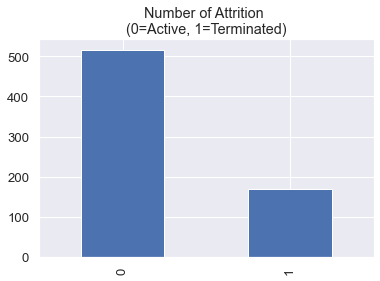

In [165]:
# Indicate the total number of attrition in 2017 and 2018
df['status'].value_counts().plot(kind='bar') # 0 = Active, 1 = Turnover
plt.title("Number of Attrition \n(0=Active, 1=Terminated)")
df['status'].value_counts(normalize=True)*100

- `75.22 %` of employees are stayed from 2017 to 2018 <br>
- `24.78 %` of employees are left from 2017 to 2018

### **4.2 Univariate Analysis - Numerical Variables (Histograms)**

In [166]:
# Pre-processing
# gets only numerical attributes
num_attributes = df.select_dtypes(include=['int64', 'float64'])

# gets only categorical attributes
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [167]:
num_attributes.columns

Index(['distance_from_home', 'manager_changes', 'bonus', 'no_courses_taken',
       'time_in_position', 'manager_sat', 'employee_sat',
       'percentage_salary_change', 'age'],
      dtype='object')

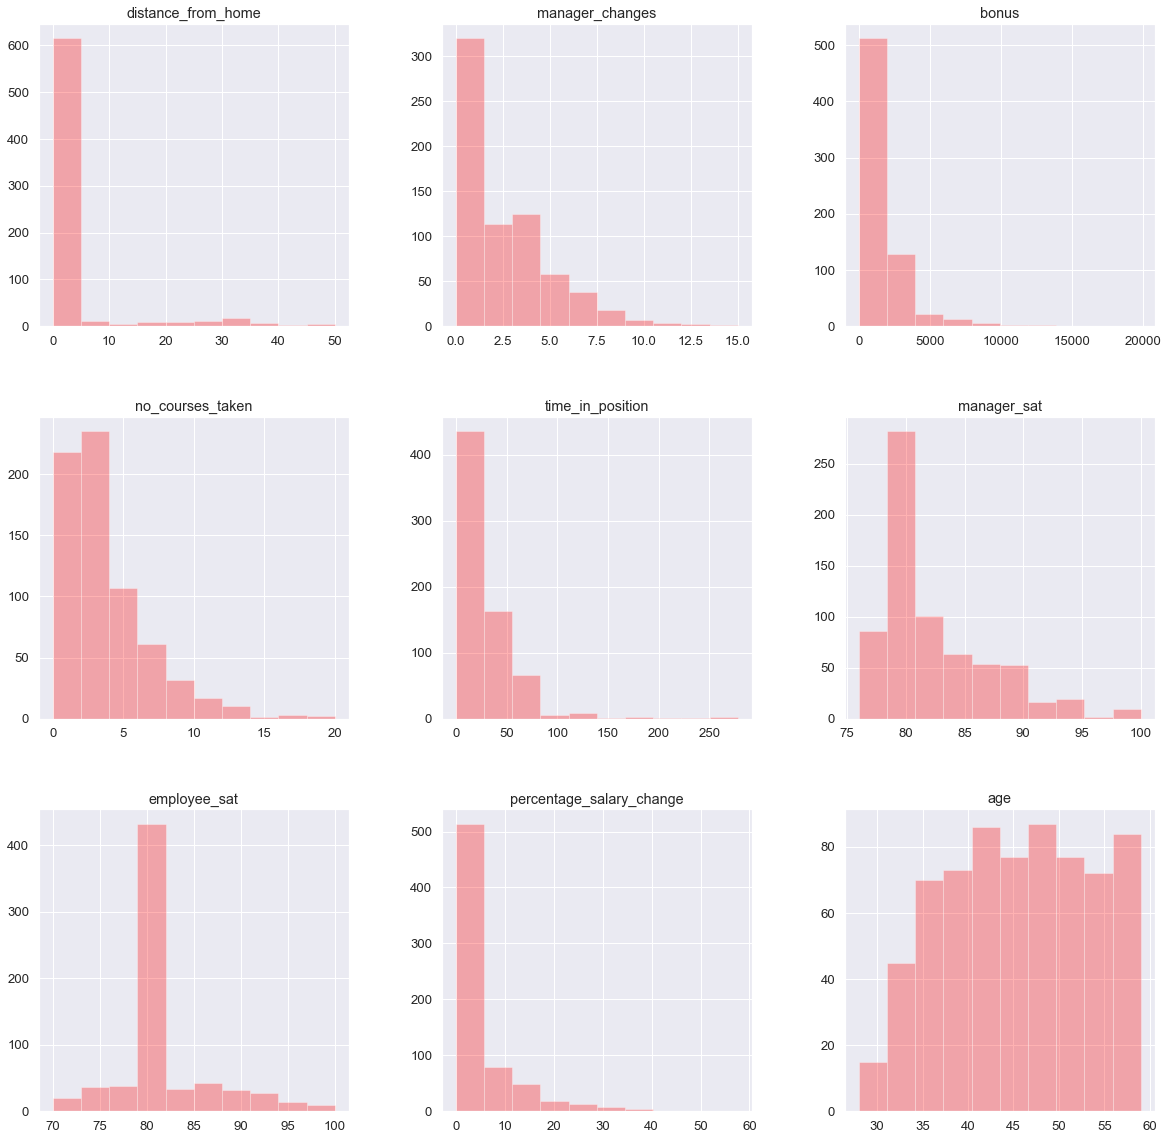

In [168]:
# plots a histogram for all numerical attributes
_ = num_attributes.hist( figsize=(20,20), color = 'red', alpha = 0.3)

### **4.3 Univariate Analysis - Categorical Variables**

In [169]:
cat_attributes.columns

Index(['status', 'service_agreement', 'job_level', 'gender',
       'no_of_promotions', 'risk_of_attrition', 'potential_rating', 'awards',
       'signon', 'var_rating'],
      dtype='object')

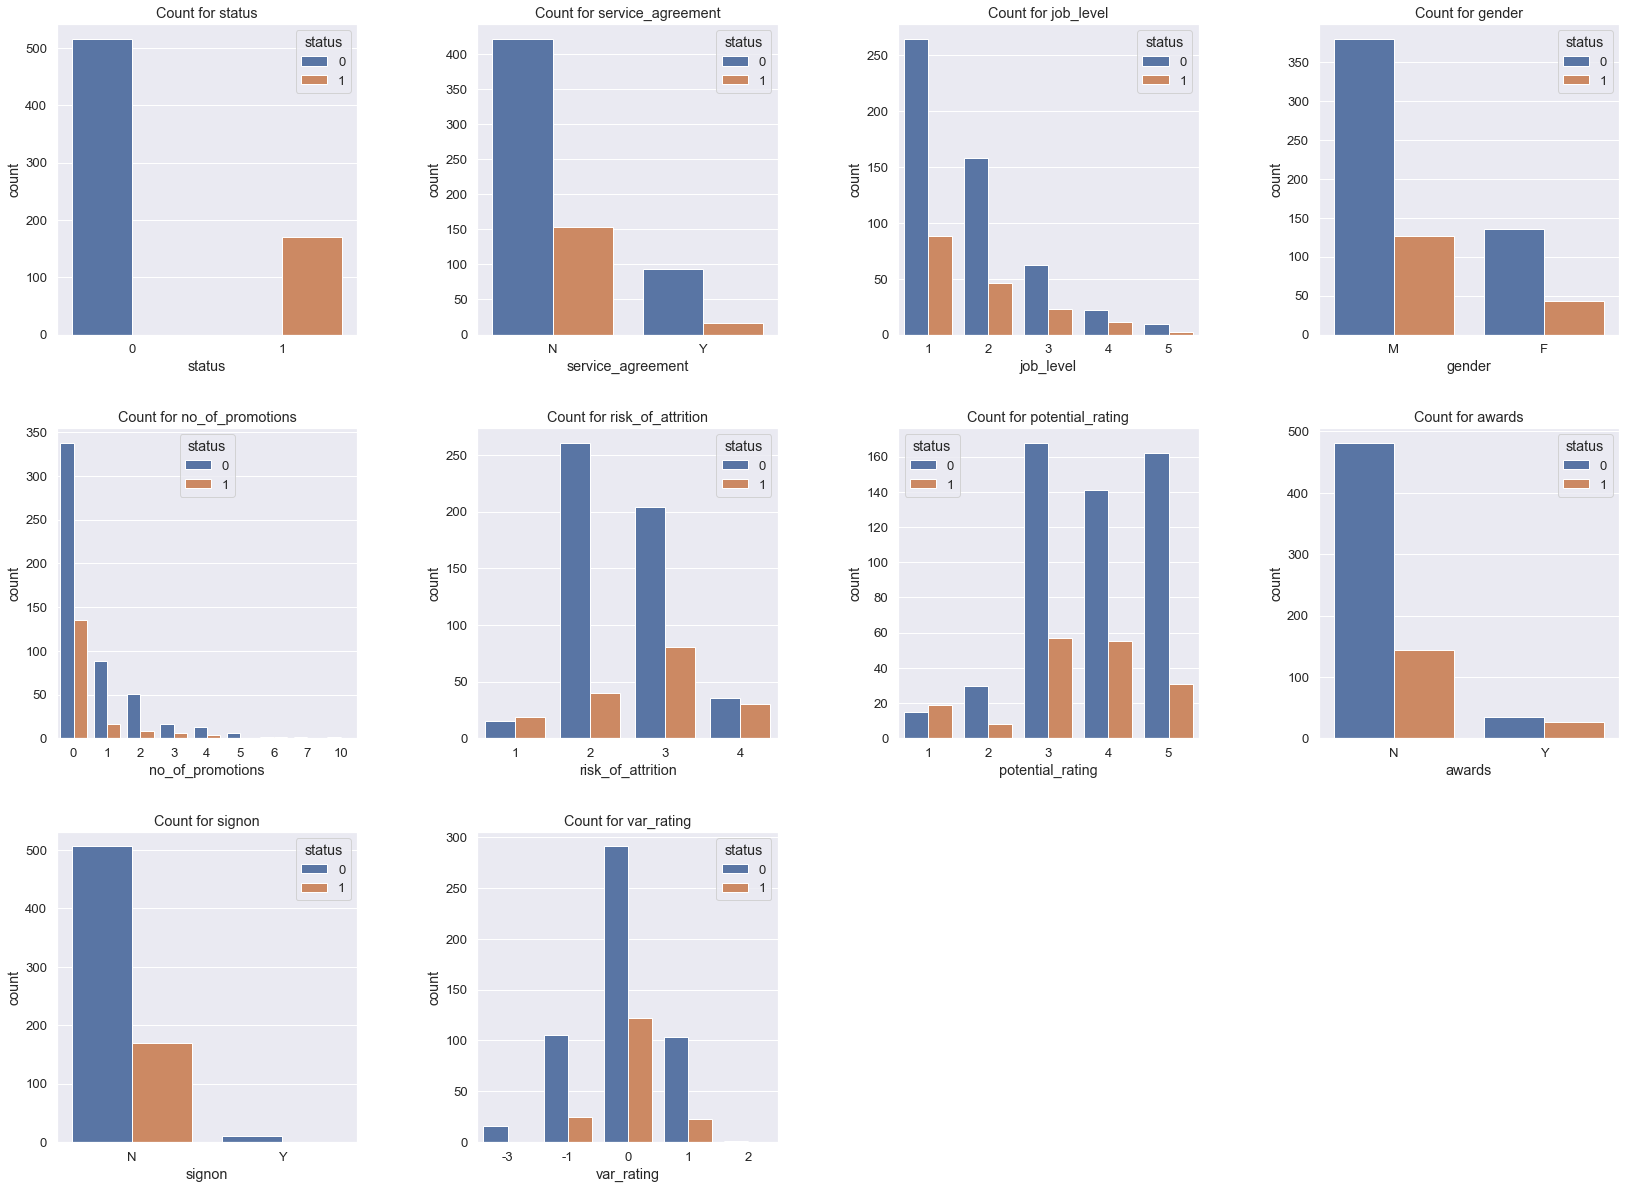

In [170]:
# sets plot size
plt.figure(figsize=(28, 28))

# sets the inital plot position
n = 1

# iterates over the columns to plot
for column in cat_attributes.columns:
    plt.subplot(4, 4, n)
    _ = sns.countplot(x=cat_attributes[column], hue=cat_attributes['status'])
    plt.title("Count for " + column)
    n += 1

# adjust height and wdith reserved for space between subplots  
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.4)

# display the plot
plt.show()

### **4.4 Bi-variate Analysis (Categorical-Categorical)**

#### 4.4.1 Active Status VS Gender

Text(0.5, 1.0, 'Attrition vs Gender \n(0=Active, 1=Terminated)')

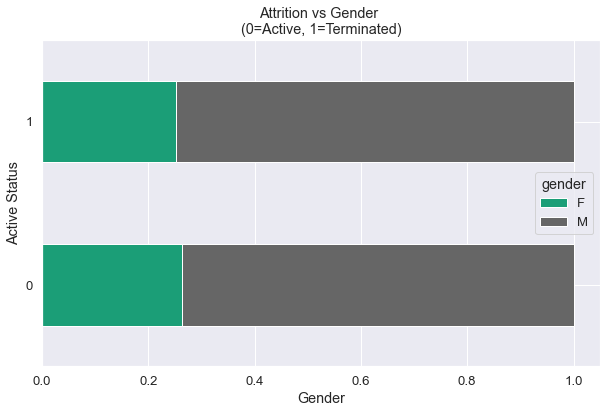

In [171]:
pd.crosstab(df.status,df.gender, normalize='index').plot(kind='barh', stacked=True, colormap='Dark2', figsize=(10, 6))
plt.xlabel("Gender")
plt.ylabel("Active Status")
plt.title("Attrition vs Gender \n(0=Active, 1=Terminated)")

In [172]:
# Creating a crosstab
print("Active Status by Gender")
pd.crosstab(df.status,df.gender)



Active Status by Gender


gender,F,M
status,,
0,136,380
1,43,127


In [173]:
print("Row wise percentage")
pd.crosstab(df.status,df.gender,normalize='index')

Row wise percentage


gender,F,M
status,,
0,0.263566,0.736434
1,0.252941,0.747059


- Row proportion table suggests that `74.71%` of employees who left were male

In [174]:
print("Columm wise percentage")
pd.crosstab(df.status,df.gender,normalize='columns')

Columm wise percentage


gender,F,M
status,,
0,0.759777,0.749507
1,0.240223,0.250493


- As observed, employees do **NOT** leave based on their gender since it is almost equally distributed.

#### 4.4.2 Active Status VS Service Agreement

In [175]:
pd.crosstab(df.status, df.service_agreement)

service_agreement,N,Y
status,,
0,422,94
1,154,16


In [176]:
# generating cross tab. Row = Status, Column = Service Agreement 
pd.crosstab(df.status, df.service_agreement,normalize='index')

service_agreement,N,Y
status,,
0,0.817829,0.182171
1,0.905882,0.094118


- Row proportion table suggests out of all employees who left, `90.59%` did not had a service agreement. Only `9.41%` had the servive agreement.

Text(0, 0.5, 'Active Status')

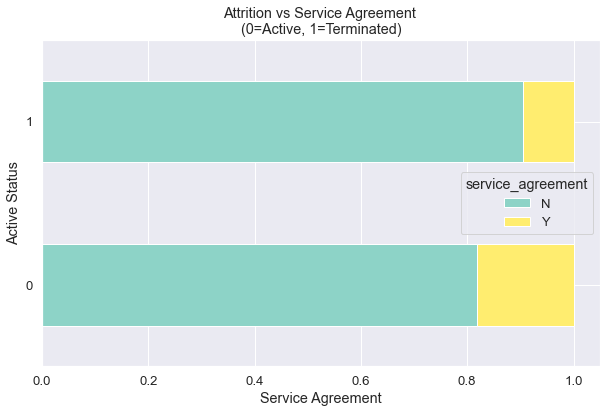

In [177]:
pd.crosstab(df.status, df.service_agreement, normalize='index').plot(kind='barh', stacked=True, colormap='Set3', figsize=(10, 6))
plt.title("Attrition vs Service Agreement \n(0=Active, 1=Terminated)")
plt.xlabel("Service Agreement")
plt.ylabel("Active Status")

In [178]:
pd.crosstab(df.status, df.service_agreement, normalize='columns')

service_agreement,N,Y
status,,
0,0.732639,0.854545
1,0.267361,0.145455


- It seems employees who did not have a service agreement prefered to leave the company as the value in column proportion table is `26.74%` compared to only `14.54%` of employees who had the service agreement left

#### 4.4.3 Active Status VS Job Level

Text(0.5, 1.0, 'Attrition vs Job Level \n(0=Active, 1=Terminated)')

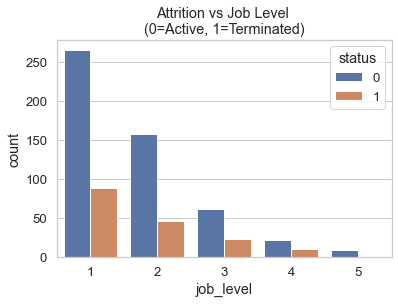

In [179]:
sns.set_style("whitegrid")
sns.countplot(x='job_level', hue='status', data=df)
plt.title("Attrition vs Job Level \n(0=Active, 1=Terminated)")

In [180]:
pd.crosstab(df.status, df.job_level)

job_level,1,2,3,4,5
status,,,,,
0,265,158,62,22,9
1,88,46,23,11,2


In [181]:
pd.crosstab(df.status, df.job_level, normalize='index')


job_level,1,2,3,4,5
status,,,,,
0,0.513566,0.306202,0.120155,0.042636,0.017442
1,0.517647,0.270588,0.135294,0.064706,0.011765


- Although the number of active employees and terminated employees are dfferent. The distribtuion of job_level is similar between levels.

In [182]:
pd.crosstab(df.status, df.job_level, normalize='columns')

job_level,1,2,3,4,5
status,,,,,
0,0.750708,0.77451,0.729412,0.666667,0.818182
1,0.249292,0.22549,0.270588,0.333333,0.181818


- Column proportion table suggests employees with level map `5(18.18%)` and `2(22.55%)` do not prefer to leave the campany in comparison to employees with level map `3(27.06%)`, `4(33.33%)` and `1(24.93%)`.

Text(0.5, 1.0, 'Attrition vs Job Level - Distribution \n(0=Active, 1=Terminated)')

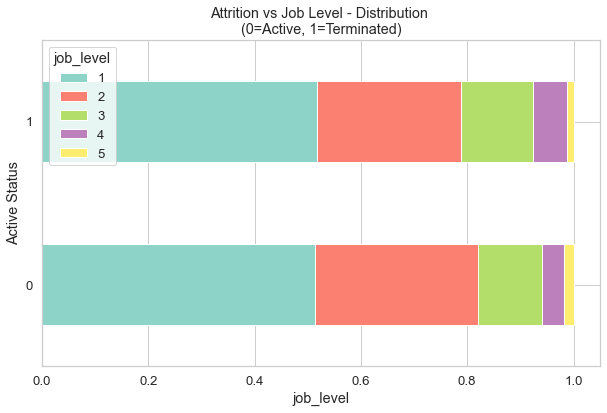

In [183]:
pd.crosstab(df.status, df.job_level, normalize='index').plot(kind='barh', stacked=True, colormap='Set3', figsize=(10, 6))
plt.xlabel("job_level")
plt.ylabel("Active Status")
plt.title("Attrition vs Job Level - Distribution \n(0=Active, 1=Terminated)")

#### 4.4.4 Active Status VS Variance in Performance Rating(var_rating)

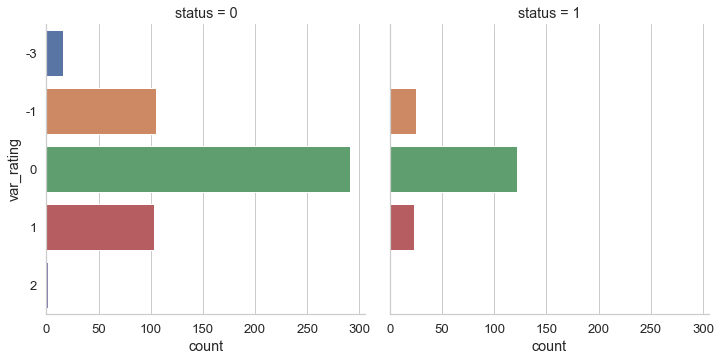

In [184]:
sns.catplot(y='var_rating', col='status', data=df, kind="count")

In [185]:
pd.crosstab(df.status, df.var_rating)

var_rating,-3,-1,0,1,2
status,,,,,
0,16,105,291,103,1
1,0,25,122,23,0


In [186]:
pd.crosstab(df.status, df.var_rating, normalize='index')

var_rating,-3,-1,0,1,2
status,,,,,
0,0.031008,0.203488,0.563953,0.199612,0.001938
1,0.000000,0.147059,0.717647,0.135294,0.000000


- The table suggests out of all the employees who left, 71.76% had var_Rating as 0. Which means their Performance Rating is not changed. And out of all the employees who left, no one had var_Rating as -3 or 2.

In [187]:
pd.crosstab(df.status, df.var_rating, normalize='columns')

var_rating,-3,-1,0,1,2
status,,,,,
0,1.0,0.807692,0.7046,0.81746,1.0
1,0.0,0.192308,0.2954,0.18254,0.0


- Column proportion table suggests maximum employees leave who have variance in rating 0(29.54%). Column proportion table suggests minimum employees leave who have variance in rating -3 and 2(0%).


#### 4.4.5 Active Status VS Number of Promotions

Text(0.5, 1.0, 'Attrition vs Number of Promotions \n(0=Active, 1=Terminated)')

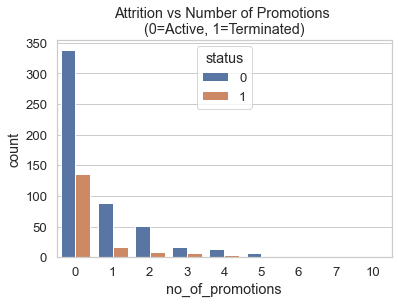

In [188]:
sns.countplot(x='no_of_promotions', hue='status', data=df)
plt.title("Attrition vs Number of Promotions \n(0=Active, 1=Terminated)")

In [189]:
pd.crosstab(df.status, df.no_of_promotions)

no_of_promotions,0,1,2,3,4,5,6,7,10
status,,,,,,,,,
0,338,88,51,16,13,6,1,2,1
1,135,16,8,6,4,0,1,0,0


In [190]:
pd.crosstab(df.status, df.no_of_promotions, normalize='index')


no_of_promotions,0,1,2,3,4,5,6,7,10
status,,,,,,,,,
0,0.655039,0.170543,0.098837,0.031008,0.025194,0.011628,0.001938,0.003876,0.001938
1,0.794118,0.094118,0.047059,0.035294,0.023529,0.000000,0.005882,0.000000,0.000000


- Row proportion table suggests out of all the employees, `79.41%` employees left who never had promotions.

In [191]:
pd.crosstab(df.status, df.no_of_promotions, normalize='columns')


no_of_promotions,0,1,2,3,4,5,6,7,10
status,,,,,,,,,
0,0.714588,0.846154,0.864407,0.727273,0.764706,1.0,0.5,1.0,1.0
1,0.285412,0.153846,0.135593,0.272727,0.235294,0.0,0.5,0.0,0.0


- Column proportion table suggests employees left the most who had 6 promotions(50%).

#### 4.4.6 Active Status vs Risk of Attrition

Text(0.5, 1.0, 'Attrition vs Risk of Attrition \n(0=Active, 1=Terminated)')

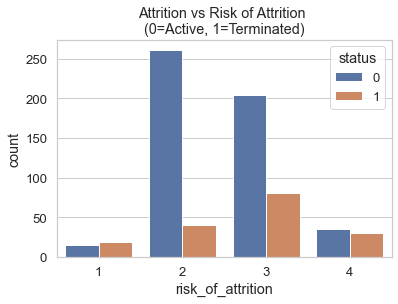

In [192]:
sns.countplot(x='risk_of_attrition', hue='status', data=df)
plt.title("Attrition vs Risk of Attrition \n(0=Active, 1=Terminated)")

In [193]:
pd.crosstab(df.status, df.risk_of_attrition)

risk_of_attrition,1,2,3,4
status,,,,
0,15,261,204,36
1,19,40,81,30


In [194]:
pd.crosstab(df.status, df.risk_of_attrition, normalize='index')


risk_of_attrition,1,2,3,4
status,,,,
0,0.029070,0.505814,0.395349,0.069767
1,0.111765,0.235294,0.476471,0.176471


- Row proportion table suggests out of all the employees who left, `47.65%` had a risk of attrition at 3.

In [195]:
pd.crosstab(df.status, df.risk_of_attrition, normalize='columns')


risk_of_attrition,1,2,3,4
status,,,,
0,0.441176,0.86711,0.715789,0.545455
1,0.558824,0.13289,0.284211,0.454545


- Column proportion table suggests `55.88%` employees left who had a risk of attrition at 1.

#### 4.4.7 Active Status vs Potential Rating

In [196]:
pd.crosstab(df.status, df.potential_rating)

potential_rating,1,2,3,4,5
status,,,,,
0,15,30,168,141,162
1,19,8,57,55,31


In [197]:
pd.crosstab(df.status, df.potential_rating, normalize='index')


potential_rating,1,2,3,4,5
status,,,,,
0,0.029070,0.058140,0.325581,0.273256,0.313953
1,0.111765,0.047059,0.335294,0.323529,0.182353


- Row proportion table suggests out of all employees who left, `33.35%` had potential as `3` and `32.35%` as `4`.

In [198]:
pd.crosstab(df.status, df.potential_rating, normalize='columns') 

potential_rating,1,2,3,4,5
status,,,,,
0,0.441176,0.789474,0.746667,0.719388,0.839378
1,0.558824,0.210526,0.253333,0.280612,0.160622


- Column proportion table suggests maximum employees leave who have potenial 1(`55.88%`). <br>
- Column proportion table suggests minimum employees leave who have potenial 5(`16.06%`).

#### 4.4.8 Active Status vs Awards

Text(0.5, 1.0, 'Attrition vs Awards \n(0=Active, 1=Terminated)')

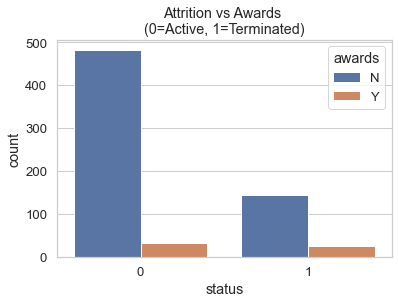

In [199]:
sns.countplot(x='status', hue='awards', data=df)
plt.title("Attrition vs Awards \n(0=Active, 1=Terminated)")

In [200]:
pd.crosstab(df.status, df.awards)

awards,N,Y
status,,
0,482,34
1,144,26


In [201]:
pd.crosstab(df.status, df.awards, normalize='index')

awards,N,Y
status,,
0,0.934109,0.065891
1,0.847059,0.152941


- Row proportion table suggests out of all employees who left, `84.71%` had not recieved any awards. Also indicating `94%` of active employees also were not awarded

In [202]:
pd.crosstab(df.status, df.awards, normalize='columns')

awards,N,Y
status,,
0,0.769968,0.566667
1,0.230032,0.433333


- Column proportion table suggests employees who received awards preferred to leave the company(`43.33%`) in comparison to people who did not receive awards(`22.67%`).

#### 4.4.9 Active Status vs Sign On Bonus

Text(0.5, 1.0, 'Attrition vs Sign On Bonus \n(0=Active, 1=Terminated)')

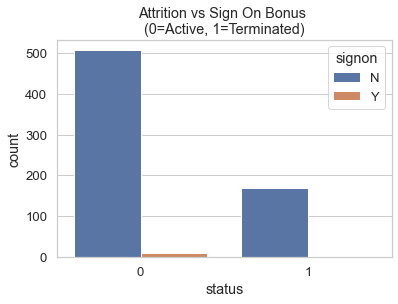

In [203]:
sns.countplot(x='status', hue='signon', data=df)
plt.title("Attrition vs Sign On Bonus \n(0=Active, 1=Terminated)")

In [204]:
pd.crosstab(df.status, df.signon)

signon,N,Y
status,,
0,506,10
1,169,1


In [205]:
pd.crosstab(df.status, df.signon, normalize='index')


signon,N,Y
status,,
0,0.980620,0.019380
1,0.994118,0.005882


- Row proportion table suggests out of all employees who left, `99.41%` did not receive a sign on bonus

In [206]:
pd.crosstab(df.status, df.signon, normalize='columns')

signon,N,Y
status,,
0,0.74963,0.909091
1,0.25037,0.090909


- Column proportion table suggests employees who received a sign on bonus preferred to stay at the company(`90.91%`) in comparison to people who did not receive a sign on bonus(`75.34%`).

### **4.5 Hypothesis Testing (Categorical and Categorical)**

#### 4.5.1 Active Status vs Gender

In [207]:
#### Chi_Square #### 부하
# step 1 : Formulating hypothesis
# H0: employee gender and active status are independent
# HA: employee gender and active status are dependent

# step 2 : Choosing the test
# Chi-Square

# step 3 : Choosing significance level
# 0.05

# step 4 : Apply the test and find p-value
table = pd.crosstab(df['gender'], df['status'])

sp.chi2_contingency(table)

# step 5 : compare p-value and the significance level

# conclusion : P Value = 0.86. p-value is greater than 0.05 we accept the null hypothesis

(0.02989476143031883,
 0.8627292328103568,
 1,
 array([[134.64139942,  44.35860058],
        [381.35860058, 125.64139942]]))

#### 4.5.2 Active Status vs Service Agreement

In [208]:
#### Chi_Square #### 
# step 1 : Formulating hypothesis
# H0: employee service agreement and active status are independent
# HA: employee service agreement and active status are dependent

# step 2 : Choosing the test
# Chi-Square

# step 3 : Choosing significance level
# 0.05

# step 4 : Apply the test and find p-value
table = pd.crosstab(df['service_agreement'], df['status'])

sp.chi2_contingency(table)

# step 5 : compare p-value and the significance level

# conclusion : P Value = 0.0095. p-value is less than 0.05 we reject the null hypothesis

(6.72420174117774,
 0.009511328983283338,
 1,
 array([[433.25947522, 142.74052478],
        [ 82.74052478,  27.25947522]]))

#### 4.5.3 Active Status vs Job Level

In [209]:
# H0: employee job level and active status are independent
# HA: employee job level and active status are dependent
table = pd.crosstab(df['job_level'], df['status'])
sp.chi2_contingency(table)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.

(2.337844062473902,
 0.6738877352129603,
 4,
 array([[265.52186589,  87.47813411],
        [153.44606414,  50.55393586],
        [ 63.93586006,  21.06413994],
        [ 24.82215743,   8.17784257],
        [  8.27405248,   2.72594752]]))

#### 4.5.4 Active Status vs Variance in Performance Rating

In [210]:
# H0: employee variance in rating and active status are independent
# HA: employee variance in rating and active status are dependent
table = pd.crosstab(df['var_rating'], df['status'])
sp.chi2_contingency(table)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent.

(15.646652000534539,
 0.0035318724704160947,
 4,
 array([[1.20349854e+01, 3.96501458e+00],
        [9.77842566e+01, 3.22157434e+01],
        [3.10653061e+02, 1.02346939e+02],
        [9.47755102e+01, 3.12244898e+01],
        [7.52186589e-01, 2.47813411e-01]]))

#### 4.5.5 Active Status vs Number of Promotions

In [211]:
# H0: employee no of promotions and active status are independent
# HA: employee no of promotions and active status are dependent
table = pd.crosstab(df['no_of_promotions'], df['status'])
sp.chi2_contingency(table)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent.

(16.234810070749838,
 0.03913994369619338,
 8,
 array([[3.55784257e+02, 1.17215743e+02],
        [7.82274052e+01, 2.57725948e+01],
        [4.43790087e+01, 1.46209913e+01],
        [1.65481050e+01, 5.45189504e+00],
        [1.27871720e+01, 4.21282799e+00],
        [4.51311953e+00, 1.48688047e+00],
        [1.50437318e+00, 4.95626822e-01],
        [1.50437318e+00, 4.95626822e-01],
        [7.52186589e-01, 2.47813411e-01]]))

#### 4.5.6 Active Status vs Risk of Attrition

In [212]:
# H0: employee risk of attrition and active status are independent
# HA: employee risk of attrition and active status are dependent
table = pd.crosstab(df['risk_of_attrition'], df['status'])
sp.chi2_contingency(table)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.

(56.128165504639895,
 3.944526151206098e-12,
 3,
 array([[ 25.57434402,   8.42565598],
        [226.40816327,  74.59183673],
        [214.37317784,  70.62682216],
        [ 49.64431487,  16.35568513]]))

#### 4.5.7 Active Status vs Potential Rating

In [213]:
# H0: employee potential rating and active status are independent
# HA: employee potential rating and active status are dependent
table = pd.crosstab(df['potential_rating'], df['status'])
sp.chi2_contingency(table)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.

(26.966061641155147,
 2.019545165087339e-05,
 4,
 array([[ 25.57434402,   8.42565598],
        [ 28.58309038,   9.41690962],
        [169.24198251,  55.75801749],
        [147.42857143,  48.57142857],
        [145.17201166,  47.82798834]]))

#### 4.5.8 Active Status vs Awards

In [214]:
# H0: employee awards and active status are independent
# HA: employee awards and active status are dependent
table = pd.crosstab(df['awards'], df['status'])
sp.chi2_contingency(table)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent.

(11.074199327587491,
 0.000875372103862832,
 1,
 array([[470.86880466, 155.13119534],
        [ 45.13119534,  14.86880466]]))

#### 4.5.9 Active Status vs Sign On Bonus

In [215]:
# H0: employee sign on bonus and active status are independent
# HA: employee sign on bonus and active status are dependent
table = pd.crosstab(df['signon'], df['status'])
sp.chi2_contingency(table)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.

(0.7449395397968127,
 0.3880831472807692,
 1,
 array([[507.72594752, 167.27405248],
        [  8.27405248,   2.72594752]]))

### **4.6 Bi-variate Analysis 2 (Categorical-Numerical)**

#### 4.6.1 Active Status vs Age

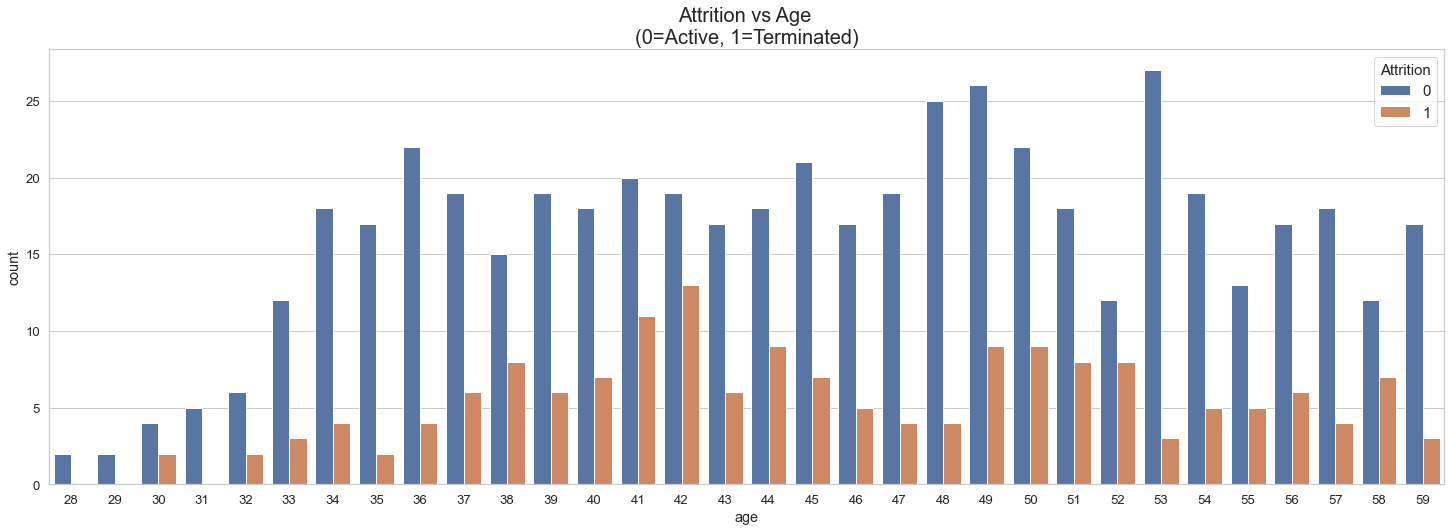

In [216]:
# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(25, 8)

# plots the graph
sns.countplot(x='age', hue='status', data=df)

# sets plot title
ax.set_title("Attrition vs Age \n(0=Active, 1=Terminated)", fontsize=20)

# sets the legend
plt.legend(title="Attrition", title_fontsize=15, fontsize=15)

# display plots
plt.show()

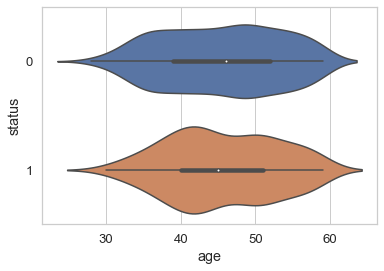

In [217]:
sns.violinplot(data=df, x='age', y='status', orient="h")
plt.show() 


In [218]:
df.pivot_table('age','status', aggfunc='mean')

,age
status,
0,45.418605
1,45.617647


In [219]:
df.pivot_table('age','status', aggfunc='median')

,age
status,
0,46
1,45


- It seems employees do not leave based on their age since the average age of the employees who stayed and lefted in the company are very close each other.

#### 4.6.2 Active Status vs Distance From Home

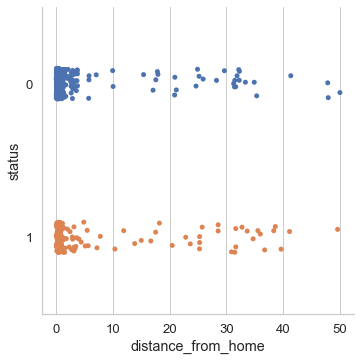

In [220]:
sns.catplot(data=df, x='distance_from_home', y='status')
plt.show() 

- It seems there is no big diffence between active employees and terminated employees based on distance from home in the cateogorical scatterplots

In [221]:
df.pivot_table('distance_from_home','status', aggfunc='mean')

,distance_from_home
status,
0,2.295310
1,5.964294


- Employees that stayed had `2.29` miles distance from home on an average.
- Employees that left the organisation had `5.69` miles distance from home on an average. Maybe employee who live farther tends to leave the company.

In [222]:
df.pivot_table('distance_from_home','status', aggfunc='median')

,distance_from_home
status,
0,0.440
1,0.675


#### 4.6.3 Active Status vs Manager Satisfaction

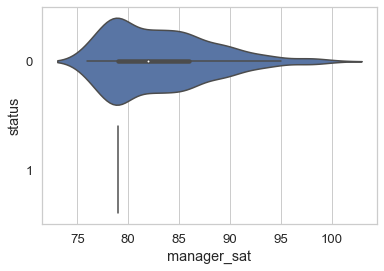

In [223]:
sns.violinplot(data=df, x='manager_sat', y='status')
plt.show() 

In [224]:
df.pivot_table('manager_sat','status', aggfunc='count')

,manager_sat
status,
0,516
1,170


In [225]:
df.pivot_table('manager_sat','status', aggfunc='mean')

,manager_sat
status,
0,83.224806
1,79.000000


In [226]:
df.pivot_table('manager_sat','status', aggfunc='median')

,manager_sat
status,
0,82
1,79


- All employees who left the organization had `79` manager satisfaction. If manager's satisfaction is below `80`, the employee prefers to leave the company.

#### 4.6.4 Active Status vs Employee Satisfaction

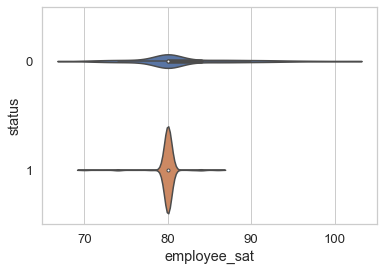

In [227]:
sns.violinplot(data=df, x='employee_sat', y='status')
plt.show() 

In [228]:
df.pivot_table('employee_sat','status', aggfunc='mean')

,employee_sat
status,
0,81.627907
1,79.958824


In [229]:
df.pivot_table('employee_sat','status', aggfunc='median')

,employee_sat
status,
0,80
1,80


- It seems employees do not leave based on employee_sat score.

#### 4.6.5 Active Status vs Bonus

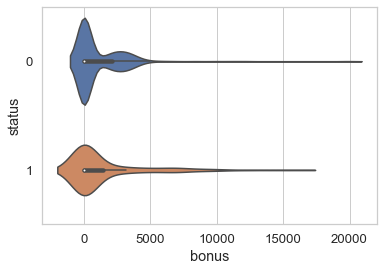

In [230]:
sns.violinplot(data=df, x='bonus', y='status')
plt.show() 

In [231]:
df.pivot_table('bonus' ,'status', aggfunc='median')

,bonus
status,
0,0
1,0


In [232]:
df.pivot_table('bonus' ,'status', aggfunc='mean')

,bonus
status,
0,1006.439922
1,1374.041176


- It seems employees do not leave based on bonus.

#### 4.6.6 Active Status vs Number of Courses Taken

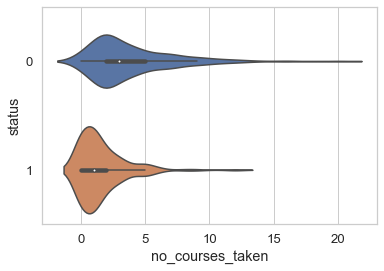

In [233]:
sns.violinplot(data=df, x='no_courses_taken', y='status')
plt.show() 

In [234]:
df.pivot_table('no_courses_taken' ,'status', aggfunc='median')

,no_courses_taken
status,
0,3
1,1


In [235]:
df.pivot_table('no_courses_taken' ,'status', aggfunc='mean')

,no_courses_taken
status,
0,3.804264
1,1.558824


- Employee who took more courses in the company prefer to stay in the company

#### 4.6.7 Active Status vs Time in Position

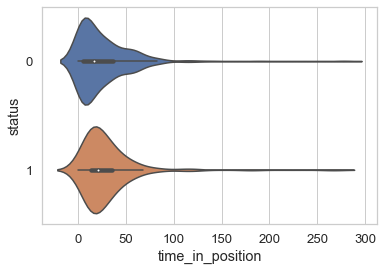

In [236]:
sns.violinplot(data=df, x='time_in_position', y='status')
plt.show() 

In [237]:
df.pivot_table('time_in_position' ,'status', aggfunc='median')

,time_in_position
status,
0,16.5
1,21.5


In [238]:
df.pivot_table('time_in_position' ,'status', aggfunc='mean')

,time_in_position
status,
0,26.637597
1,29.494118


- It seems employees do not leave based on their time_in_position.

#### 4.6.8 Active Status vs Salary Change Percentage

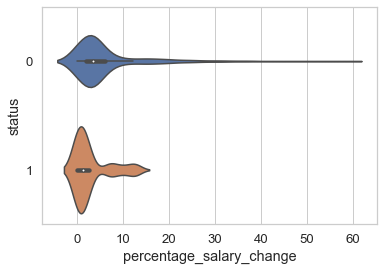

In [239]:
sns.violinplot(data=df, x='percentage_salary_change', y='status')
plt.show() 

In [240]:
df.pivot_table('percentage_salary_change','status', aggfunc='median')

,percentage_salary_change
status,
0,3.516551
1,1.279881


In [241]:
df.pivot_table('percentage_salary_change','status', aggfunc='mean')

,percentage_salary_change
status,
0,5.884491
1,2.899859


- employees that left the organisation had 2.89 % salary change on an average.
- employees that left the organisation had 5.88 % salary change on an average.
This suggests that employees with less salary change tend to leave. 

#### 4.6.9 Active Status vs Number of Manager Changes

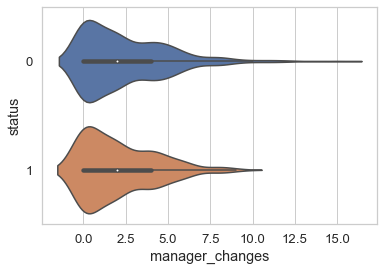

In [242]:
sns.violinplot(data=df, x='manager_changes', y='status')
plt.show() 

In [243]:
df.pivot_table('manager_changes','status', aggfunc='median')

,manager_changes
status,
0,2
1,2


In [244]:
df.pivot_table('manager_changes','status', aggfunc='mean')

,manager_changes
status,
0,2.420543
1,2.064706


- The graph and crosstab indicate that the employee doesn't leave based on the number of manager changes.

### **4.7 Hypothesis Test 2 (Welch Two Sample T-Test for Numerical and Categorical Variables)**

#### 4.7.1 Active Status vs Age

In [245]:
sp.stats.ttest_ind(df.query('status==0')['age'], df.query('status==1')['age'], equal_var=False)
# As p value > 0.05 we accept null hypothesis, i.e. both age and status are independent. 
# This means employees do not leave on the basis of age.

Ttest_indResult(statistic=-0.30302035013621026, pvalue=0.7620774744278347)

#### 4.7.2 Active Status vs Distance From Home

In [246]:
sp.stats.ttest_ind(df.query('status==0')['distance_from_home'], df.query('status==1')['distance_from_home'], equal_var=False)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent. 
# This means employees leave on the basis of distance from home.

Ttest_indResult(statistic=-3.9851900818815666, pvalue=9.250369894586824e-05)

#### 4.7.3 Active Status vs Manager Satisfaction

In [247]:
sp.stats.ttest_ind(df.query('status==0')['manager_sat'], df.query('status==1')['manager_sat'], equal_var=False)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.
# This means employees do not leave on the basis of manager satisfaction score.


Ttest_indResult(statistic=18.569080434483556, pvalue=2.6583577447568862e-59)

#### 4.7.4 Active Status vs Employee Satisfaction

In [248]:
sp.stats.ttest_ind(df.query('status==0')['employee_sat'], df.query('status==1')['employee_sat'], equal_var=False)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.
# This means employees do not leave on the basis of employee satisfaction score.


Ttest_indResult(statistic=6.259565555324769, pvalue=7.124903242081429e-10)

#### 4.7.5 Active Status vs Bonus

In [249]:
sp.stats.ttest_ind(df.query('status==0')['bonus'], df.query('status==1')['bonus'], equal_var=False)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.
# This means employees do not leave on the basis of bonus.

Ttest_indResult(statistic=-1.5957931394934997, pvalue=0.11197814140506042)

#### 4.7.6 Active Status vs Number of Courses Taken

In [250]:
sp.stats.ttest_ind(df.query('status==0')['no_courses_taken'], df.query('status==1')['no_courses_taken'], equal_var=False)
# As p value < 0.05 we reject null hypothesis, i.e. both the variables are dependent.
# This means employees leave on the basis of number of courses taken.

Ttest_indResult(statistic=11.234040426779318, pvalue=2.9487052569845047e-26)

#### 4.7.7 Active Status vs Time in Position

In [251]:
sp.stats.ttest_ind(df.query('status==0')['time_in_position'], df.query('status==1')['time_in_position'], equal_var=False)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.
# This means employees do not leave on the basis of time in position.

Ttest_indResult(statistic=-1.06238625399604, pvalue=0.28890161247369256)

#### 4.7.8 Active Status vs Salary Change Percentage

In [252]:
sp.stats.ttest_ind(df.query('status==0')['percentage_salary_change'], df.query('status==1')['percentage_salary_change'], equal_var=False)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.
# This means employees do not leave on the basis of percentage salary change.

Ttest_indResult(statistic=6.746201045594163, pvalue=3.849146695384319e-11)

4.7.9 Active Status vs Number of Manager Changes

In [253]:
sp.stats.ttest_ind(df.query('status==0')['manager_changes'], df.query('status==1')['manager_changes'], equal_var=False)
# As p value > 0.05 we accept null hypothesis, i.e. both the variables are independent.
# This means employees do not leave on the basis of number of manager changes.

Ttest_indResult(statistic=1.7954327876145335, pvalue=0.07348716517558528)

# **4.8. Summary of Hypothesis Test**

|Factor|Hypothesis|Conclusion|
|------|---|---|
|Gender|Employee do not leave based on their gender|TRUE|
|Service Agreement|Employee who did not have the service agreemment perferred to leave the company|TRUE|
|Job Level|Employee whose Job Level 5 and 2 do not prefer to leave the company compared to who are 1, 3 and 4|FALSE|
|Variance in Performance Rating|Employee who didn't have any changes in Performance Rating between 2017 and 2018 prefer to leave the company|TRUE|
|Number of Promotions|Employee who did't have any promotion prefer to leave the company|TRUE|
|Risk of Attrition|Risk of Attrition is significantly related to the actual employee turnover|FALSE|
|Potential Rating|Employee's potential rating in 2019 is significantly related to the actual employee turnover|FALSE|
|Awards|Employee who received the award prefer to leave the company|TRUE|
|Sign On Bonus|Employee who received the sign on bonus prefer to stay in the company|FALSE|
|Age|Employee do not leave the company based on their age|TRUE|
|Distance From Home|Distance from home is significantly related to the actual employees turnover |TRUE|
|Manager Satisfaction|Manager's satisfaction is significantly related to the actual employees turnover |FALSE|
|Employee Satisfaction|Employee do not leave the company based on their satisfaction|TRUE|
|Bonus|Employee do not leave the company based on their bonus|TRUE|
|Number of Courses Taken|Employee prefer to leave when they took lessor courses|TRUE|
|Time in Position|Employee do not leave the company based on the time in the current position|TRUE|
|Salary Change Percentage|Employee who had a lower percentage in salary increase tend to leave the company|FALSE|
|Number of Manager Changes|Employee do not leave the company based on the number of manager changes|TRUE|


# **4.9. Multivariate Analysis (Correlations)**

array([[<AxesSubplot:xlabel='distance_from_home', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='manager_changes', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='bonus', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='no_courses_taken', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='time_in_position', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='manager_sat', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='employee_sat', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='percentage_salary_change', ylabel='distance_from_home'>,
        <AxesSubplot:xlabel='age', ylabel='distance_from_home'>],
       [<AxesSubplot:xlabel='distance_from_home', ylabel='manager_changes'>,
        <AxesSubplot:xlabel='manager_changes', ylabel='manager_changes'>,
        <AxesSubplot:xlabel='bonus', ylabel='manager_changes'>,
        <AxesSubplot:xlabel='no_courses_taken', ylabel='manager_changes'>,
        <AxesSubplot:xlabel='ti

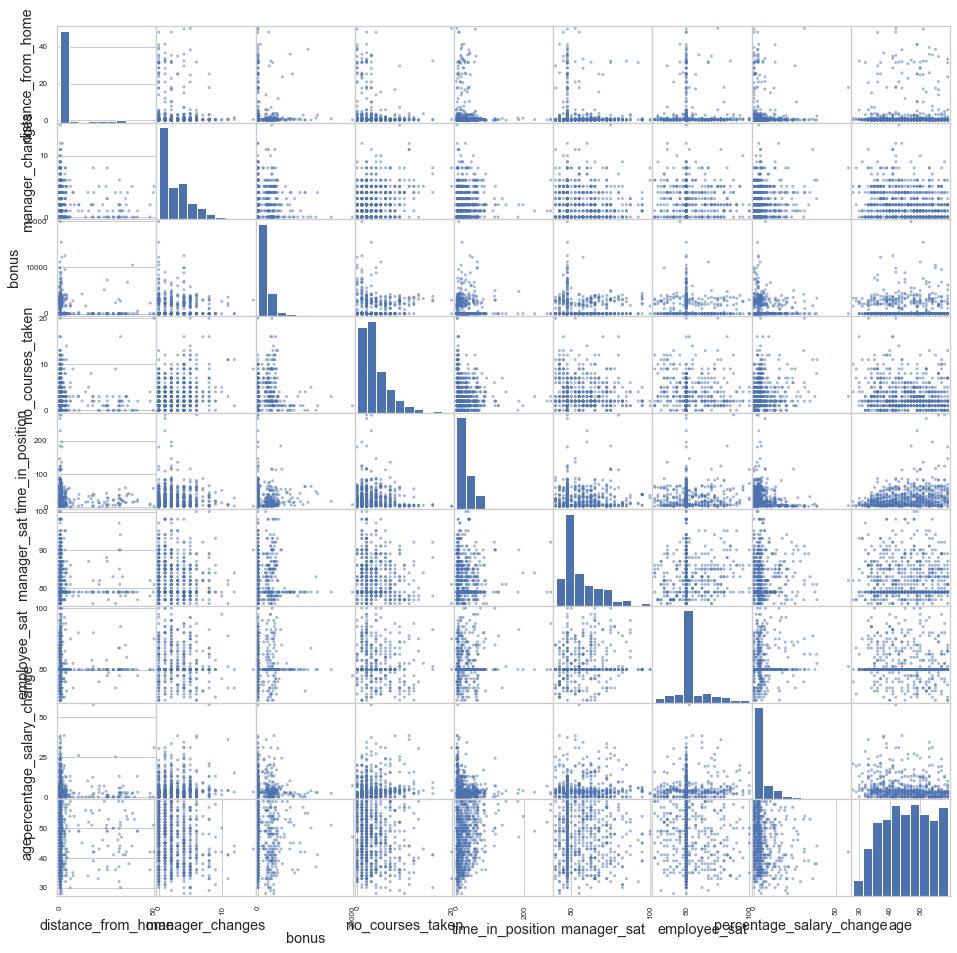

In [254]:
# plot the scatter martix of Numerical Variables
from pandas.plotting import scatter_matrix
scatter_matrix(num_attributes, figsize=(16, 16)) 

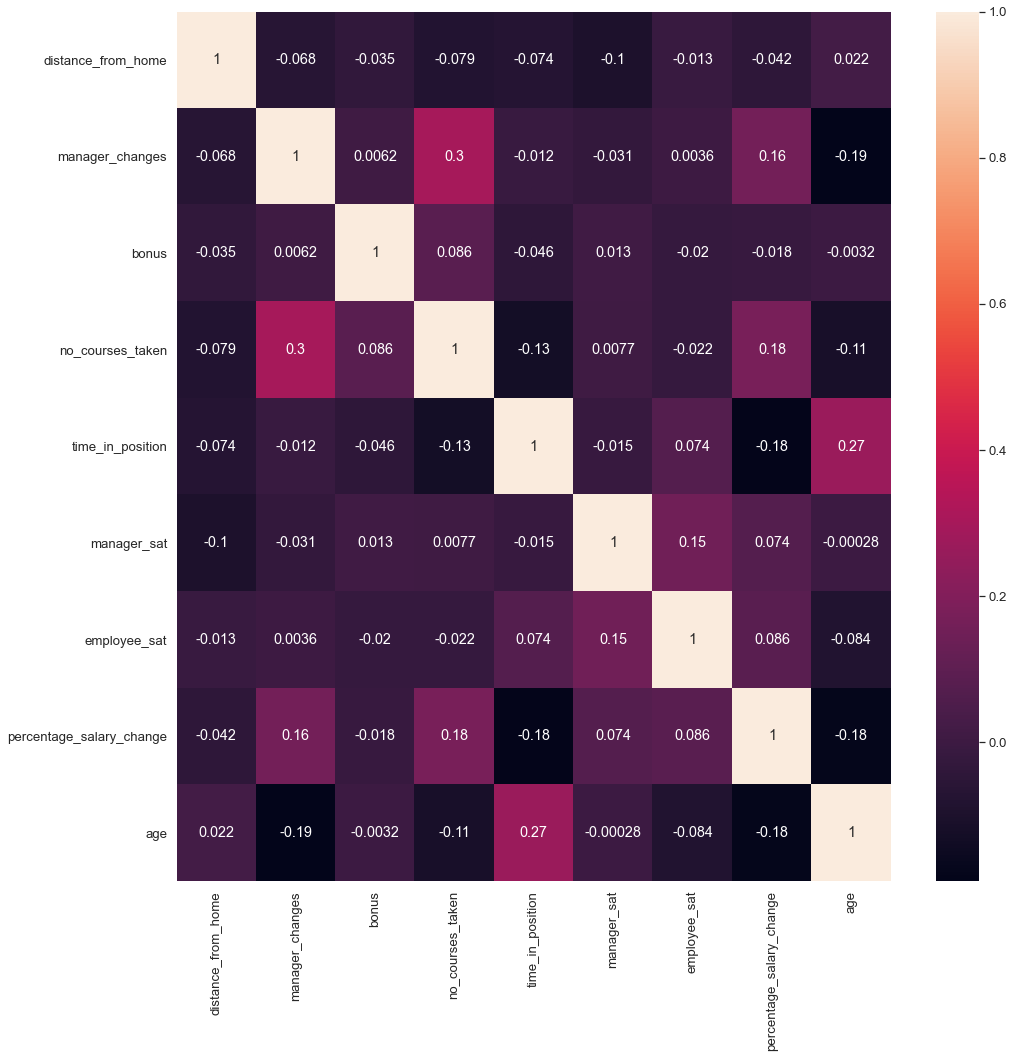

In [255]:
# gets the correlation between the numerical variables
correlation = num_attributes.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(16, 16)

# plots the heatmap
sns.heatmap(correlation, annot=True)

# displays the plot
plt.show()

# **5. Feature Engineering**

In [256]:
# Droping insignificant variables
df=df.drop(['gender','job_level','signon','age','manager_changes','bonus','time_in_position'],axis=1) 


In [257]:
df.dtypes

status                      category
service_agreement             object
distance_from_home           float64
no_of_promotions            category
risk_of_attrition           category
potential_rating            category
no_courses_taken               int64
awards                        object
manager_sat                    int64
employee_sat                   int64
var_rating                  category
percentage_salary_change     float64
dtype: object

### **5.1 Variable Creation(Label Encoding)**

In [258]:
# check categorical variables
cat_attributes

,status,service_agreement,job_level,gender,no_of_promotions,risk_of_attrition,potential_rating,awards,signon,var_rating
0,0,N,3,M,2,2,5,N,N,1
1,0,N,2,M,3,2,5,N,N,-1
2,0,N,2,M,0,3,3,N,N,0
3,0,N,1,F,0,2,5,N,N,0
4,0,N,2,M,0,2,5,N,N,0
...,...,...,...,...,...,...,...,...,...,...
681,1,N,3,M,0,4,4,N,N,0
682,1,N,1,M,0,3,3,N,N,-1
683,1,N,1,M,0,4,3,N,N,0
684,1,N,1,F,0,3,4,Y,N,0


In [259]:
# check numerical variables
num_attributes

,distance_from_home,manager_changes,bonus,no_courses_taken,time_in_position,manager_sat,employee_sat,percentage_salary_change,age
0,0.52,1,0,8,30,81,80,3.505101,51
1,0.08,4,2242,6,5,88,84,1.502064,47
2,0.51,2,0,2,53,83,93,12.670835,46
3,0.81,1,2320,2,36,86,83,3.761866,50
4,0.06,4,0,10,2,79,80,0.000000,57
...,...,...,...,...,...,...,...,...,...
681,1.10,0,6438,0,17,79,80,1.201349,52
682,25.27,8,0,0,17,79,80,1.201349,37
683,1.09,1,0,3,43,79,80,1.201349,51
684,0.34,5,0,3,27,79,80,1.201349,38


In [260]:
cat_attributes

,status,service_agreement,job_level,gender,no_of_promotions,risk_of_attrition,potential_rating,awards,signon,var_rating
0,0,N,3,M,2,2,5,N,N,1
1,0,N,2,M,3,2,5,N,N,-1
2,0,N,2,M,0,3,3,N,N,0
3,0,N,1,F,0,2,5,N,N,0
4,0,N,2,M,0,2,5,N,N,0
...,...,...,...,...,...,...,...,...,...,...
681,1,N,3,M,0,4,4,N,N,0
682,1,N,1,M,0,3,3,N,N,-1
683,1,N,1,M,0,4,3,N,N,0
684,1,N,1,F,0,3,4,Y,N,0


In [261]:
target_var = cat_attributes[['status']]

In [262]:
# Dummy Variable Creation
cat_var=pd.get_dummies(cat_attributes[['service_agreement', 'job_level', 'gender', 'no_of_promotions', 'risk_of_attrition', 'potential_rating', 'awards', 'signon', 'var_rating']])


In [263]:
cat_var.head()

,service_agreement_N,service_agreement_Y,job_level_1,job_level_2,job_level_3,job_level_4,job_level_5,gender_F,gender_M,no_of_promotions_0,...,potential_rating_5,awards_N,awards_Y,signon_N,signon_Y,var_rating_-3,var_rating_-1,var_rating_0,var_rating_1,var_rating_2
0,1,0,0,0,1,0,0,0,1,0,...,1,1,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,1,...,1,1,0,1,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,1,1,...,1,1,0,1,0,0,0,1,0,0


In [264]:
# rename the columns to minimize computation errors
cat_var.rename(columns = {'var_rating_-3':'var_rating_minus3', 'var_rating_-1':'var_rating_minus1'}, inplace = True)

In [265]:
cat_var.columns

Index(['service_agreement_N', 'service_agreement_Y', 'job_level_1',
       'job_level_2', 'job_level_3', 'job_level_4', 'job_level_5', 'gender_F',
       'gender_M', 'no_of_promotions_0', 'no_of_promotions_1',
       'no_of_promotions_2', 'no_of_promotions_3', 'no_of_promotions_4',
       'no_of_promotions_5', 'no_of_promotions_6', 'no_of_promotions_7',
       'no_of_promotions_10', 'risk_of_attrition_1', 'risk_of_attrition_2',
       'risk_of_attrition_3', 'risk_of_attrition_4', 'potential_rating_1',
       'potential_rating_2', 'potential_rating_3', 'potential_rating_4',
       'potential_rating_5', 'awards_N', 'awards_Y', 'signon_N', 'signon_Y',
       'var_rating_minus3', 'var_rating_minus1', 'var_rating_0',
       'var_rating_1', 'var_rating_2'],
      dtype='object')

In [266]:
num_var = num_attributes

In [267]:
new_df = pd.concat([target_var, cat_var,num_var], axis=1)
new_df.head()


,status,service_agreement_N,service_agreement_Y,job_level_1,job_level_2,job_level_3,job_level_4,job_level_5,gender_F,gender_M,...,var_rating_2,distance_from_home,manager_changes,bonus,no_courses_taken,time_in_position,manager_sat,employee_sat,percentage_salary_change,age
0,0,1,0,0,0,1,0,0,0,1,...,0,0.52,1,0,8,30,81,80,3.505101,51
1,0,1,0,0,1,0,0,0,0,1,...,0,0.08,4,2242,6,5,88,84,1.502064,47
2,0,1,0,0,1,0,0,0,0,1,...,0,0.51,2,0,2,53,83,93,12.670835,46
3,0,1,0,1,0,0,0,0,1,0,...,0,0.81,1,2320,2,36,86,83,3.761866,50
4,0,1,0,0,1,0,0,0,0,1,...,0,0.06,4,0,10,2,79,80,0.000000,57


In [268]:
new_df.shape

(686, 46)

### **5.2 Variable Transformation (Normalization)**

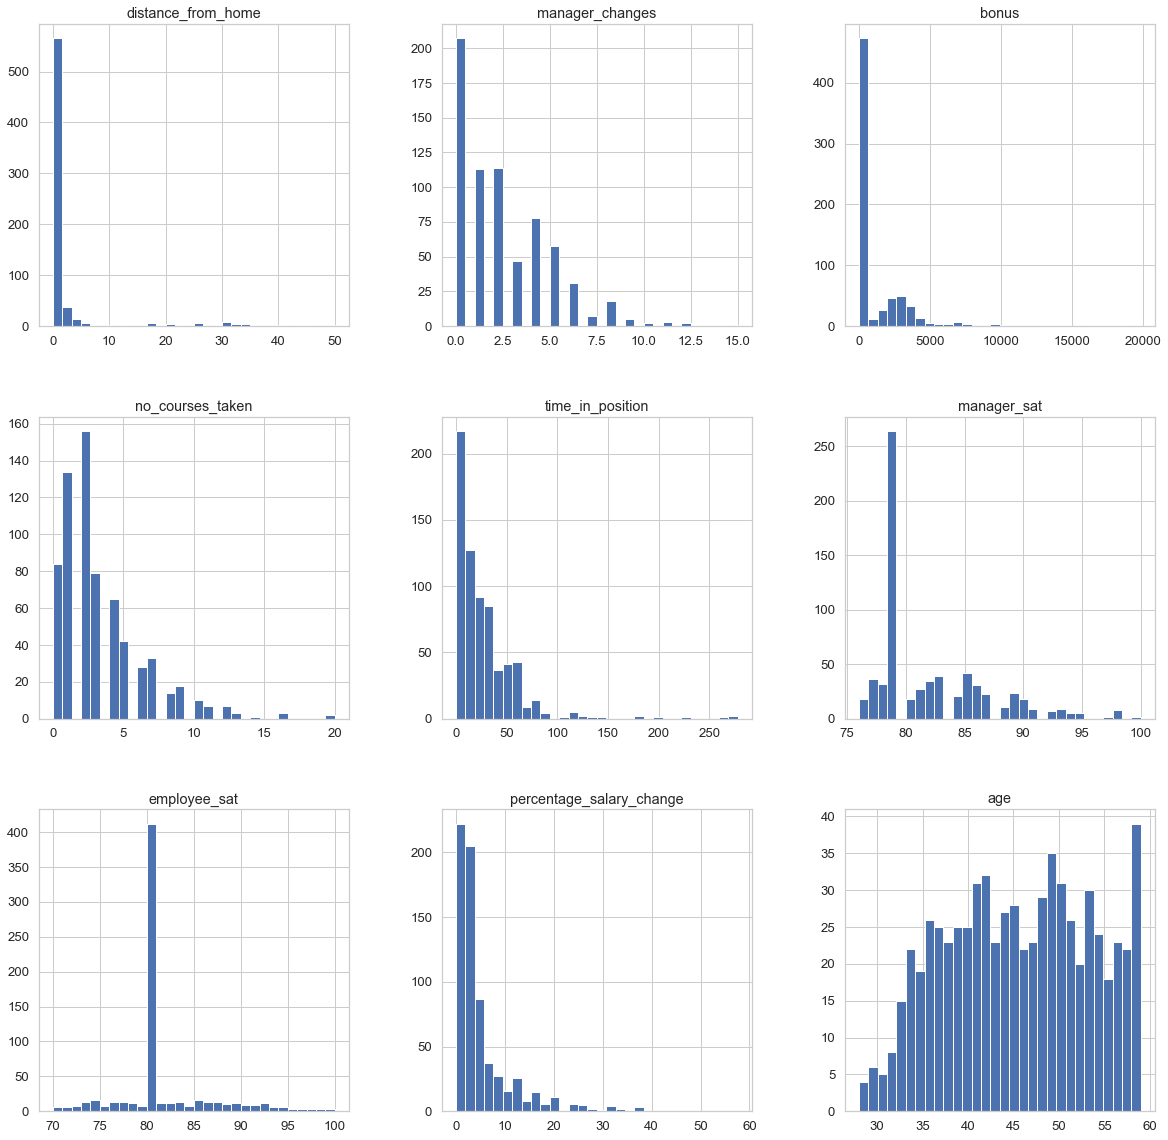

In [269]:
# plots a histogram for all numerical attributes
plt.rc('font', size=30)        # 기본 폰트 크기
_ = num_attributes.hist(bins=30, figsize=(20,20))


* As we can observe, there is no ariable presenting a normal distribution, not even nearly normal. So, it is preferred to leave as it is than to risk a erroneous normalization.

c:\Users\heeckim\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

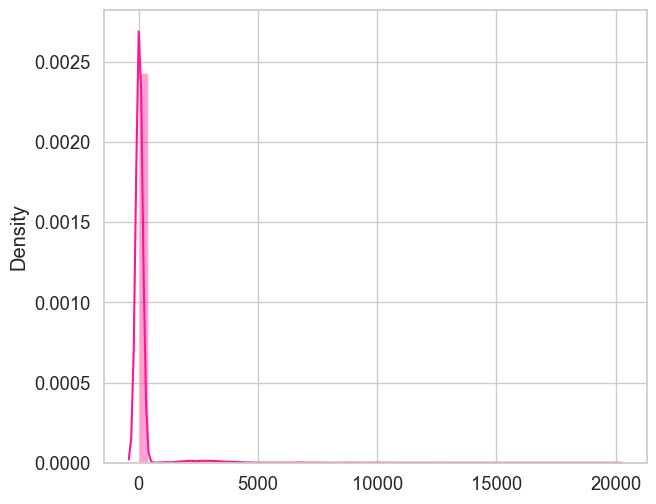

In [270]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot(num_attributes, color="deeppink")

# **6. Machine Learning Modeling**

### **6.1 Data Split into Train and Test**

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [272]:
new_df

,status,service_agreement_N,service_agreement_Y,job_level_1,job_level_2,job_level_3,job_level_4,job_level_5,gender_F,gender_M,...,var_rating_2,distance_from_home,manager_changes,bonus,no_courses_taken,time_in_position,manager_sat,employee_sat,percentage_salary_change,age
0,0,1,0,0,0,1,0,0,0,1,...,0,0.52,1,0,8,30,81,80,3.505101,51
1,0,1,0,0,1,0,0,0,0,1,...,0,0.08,4,2242,6,5,88,84,1.502064,47
2,0,1,0,0,1,0,0,0,0,1,...,0,0.51,2,0,2,53,83,93,12.670835,46
3,0,1,0,1,0,0,0,0,1,0,...,0,0.81,1,2320,2,36,86,83,3.761866,50
4,0,1,0,0,1,0,0,0,0,1,...,0,0.06,4,0,10,2,79,80,0.000000,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,1,1,0,0,0,1,0,0,0,1,...,0,1.10,0,6438,0,17,79,80,1.201349,52
682,1,1,0,1,0,0,0,0,0,1,...,0,25.27,8,0,0,17,79,80,1.201349,37
683,1,1,0,1,0,0,0,0,0,1,...,0,1.09,1,0,3,43,79,80,1.201349,51
684,1,1,0,1,0,0,0,0,1,0,...,0,0.34,5,0,3,27,79,80,1.201349,38


In [273]:
# Create the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

### **6.2 Train Logistic Regression Model**

In [274]:
%%time

# Check accuracy of Logistic Model# Check  
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression Model
lrmodel = LogisticRegression(class_weight='balanced')

# Fit the Logistic Regression Model to the train set
lrmodel.fit(X_train, y_train)

# accuracy = correct_predictions / total_predictions
# predict(x_test) x_test로부터 라벨 예측
# Accuracy is the proportion of correct predictions over total predictions. This is how we can find the accuracy with logistic regression:
print ("Accuracy Score is %2.2f" % accuracy_score(y_test, lrmodel.predict(X_test)))

Accuracy Score is 0.62
Wall time: 74.3 ms


c:\Users\heeckim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Text(0.5, 10.5, 'Prediction(Negative/Positive)'),
 Text(28.5, 0.5, 'Actual(Positive/Negative)')]

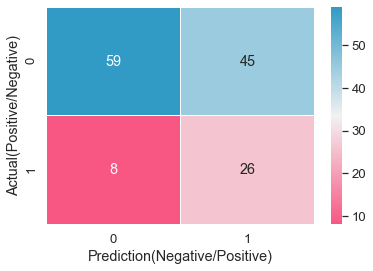

In [275]:
sns.set(font_scale=1.2)
# color selection
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
lr_cm = sns.heatmap(confusion_matrix(y_test, lrmodel.predict(X_test)),cmap=cmap ,annot=True, linewidth=0.3)
lr_cm.set(xlabel='Prediction(Negative/Positive)', ylabel='Actual(Positive/Negative)')

#### 6.2.1 Apply 10-Fold Cross Validation for Logistic Regression

In [276]:
%%time
from sklearn import model_selection

# Define the 10-Fold Cross Validation
# n_splits(필수) 세트수, random_state(옵션) shuffle이 Ture일때 시드 값, shuffle(옵션): True일 때 데이터셋을 섞어서 분할
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

# Define the Logistic Regression Model
lrCV = LogisticRegression(class_weight='balanced')

# Define the evaluation metric 
scoring = 'roc_auc'

# estimater = 분류 알고리즘, feature 데이터셋, label 데이터셋, cv=교차검증방법, scoring은 방식 average도 가능)
# Train the Logistic Regression Model on the 10-Fold Cross Validation
lr_results = model_selection.cross_val_score(lrCV, X_train, y_train, cv=kfold, scoring=scoring)

c:\Users\heeckim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\heeckim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Wall time: 716 ms


c:\Users\heeckim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\heeckim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [277]:
# Print out the 10 scores from the training. Notice how you get a wide range of scores compared to one single training
lr_results

array([0.91374269, 0.70209059, 0.89164087, 0.8021978 , 0.85077519,
       0.80888889, 0.79338843, 0.76446281, 0.84803002, 0.74506579])

#### 6.2.2 Average Score

Let's use AUC as a general baseline to compare our model's performance. After comparing, we can then select the best one and look at its precision and recall.

In [278]:
# Print out the mean and standard deviation of the training score
lr_auc = lr_results.mean()
print("The Logistic Regression AUC: %.3f and the STD is (%.3f)" % (lr_auc, lr_results.std()))

The Logistic Regression AUC: 0.812 and the STD is (0.062)


#### 6.2.3 Logistic Regression AUC

In [279]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lrmodel.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lrmodel.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.67
              precision    recall  f1-score   support

           0       0.88      0.57      0.69       104
           1       0.37      0.76      0.50        34

    accuracy                           0.62       138
   macro avg       0.62      0.67      0.59       138
weighted avg       0.75      0.62      0.64       138



### **6.3 Train Random Forest Classifier Model**

In [280]:
%%time

from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(
    class_weight="balanced"
    )

# Fit the RF Model
rf = rf.fit(X_train, y_train)

Wall time: 223 ms


#### 6.3.1 Apply 10-Fold Cross Validation

In [281]:
%%time
rf_results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
rf_results

Wall time: 2.02 s


array([0.98538012, 0.97299652, 0.96671827, 0.98717949, 0.99031008,
       0.96111111, 0.96900826, 0.97727273, 0.97560976, 0.98930921])

#### 6.3.2 Average Score

In [282]:
# Print out the mean and standard deviation of the training score
rf_auc = rf_results.mean()
print("The Random Forest AUC: %.3f and the STD is (%.3f)" % (rf_auc, rf_results.std()))

The Random Forest AUC: 0.977 and the STD is (0.010)


#### 6.3.3 Random Forest AUC

In [283]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.84
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.81      0.74      0.77        34

    accuracy                           0.89       138
   macro avg       0.86      0.84      0.85       138
weighted avg       0.89      0.89      0.89       138



### **6.4 Train Support Vector Classifier Model**

In [284]:
%%time 

from sklearn.svm import SVC 

svclassifier = SVC(kernel='rbf', probability=True)  

svc = svclassifier.fit(X_train,y_train)

Wall time: 102 ms


#### 6.4.1 Apply 10-Fold Cross Validation for Random Forest

In [285]:
%%time

svc_result = model_selection.cross_val_score(svc, X_train, y_train, cv=kfold, scoring=scoring)
svc_result

Wall time: 1.01 s


array([0.84210526, 0.76829268, 0.6625387 , 0.87728938, 0.72868217,
       0.61777778, 0.64256198, 0.76239669, 0.75234522, 0.54111842])

#### 6.4.2 Average Score

In [286]:
svc_auc = svc_result.mean()
print("The Supper Vector Classifier AUC: %.3f and the STD is (%.3f)" % (rf_auc, rf_results.std()))

The Supper Vector Classifier AUC: 0.977 and the STD is (0.010)


#### 6.4.3 Suppoer Vector Classifier 

In [287]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Support Vector Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Support Vector Classifier AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Support Vector Model---
Support Vector Classifier AUC = 0.84
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.81      0.74      0.77        34

    accuracy                           0.89       138
   macro avg       0.86      0.84      0.85       138
weighted avg       0.89      0.89      0.89       138



### **6.5 ROC Graph**

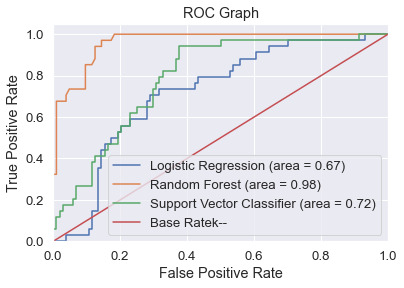

In [288]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lrmodel.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc)

# Plot Decision Tree ROC
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier (area = %0.2f)' % svc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### **6.6 Random Forest Feature Importances**

<AxesSubplot:xlabel='importance', ylabel='index'>

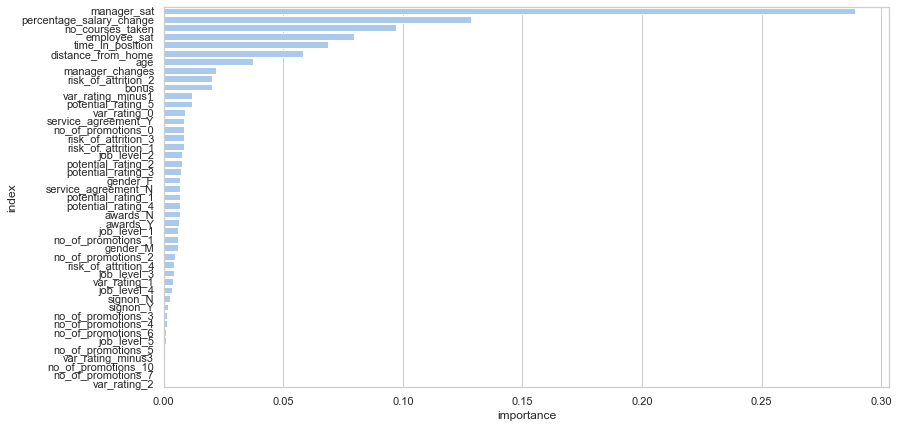

In [299]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

In [317]:
rf.feature_importances_

array([6.92336967e-03, 8.60481032e-03, 6.18622612e-03, 7.71638229e-03,
       4.21263594e-03, 3.37402779e-03, 8.14965067e-04, 7.00722079e-03,
       5.83454373e-03, 8.59467929e-03, 5.98548992e-03, 4.62940042e-03,
       1.55387211e-03, 1.51361606e-03, 6.75245234e-04, 9.46365248e-04,
       2.87923249e-17, 4.55094829e-05, 8.49311652e-03, 2.02949840e-02,
       8.56575989e-03, 4.47695994e-03, 6.81972091e-03, 7.68965578e-03,
       7.03035697e-03, 6.81720151e-03, 1.17788767e-02, 6.71457293e-03,
       6.46187701e-03, 2.68229216e-03, 1.78285095e-03, 5.57750940e-04,
       1.20311774e-02, 9.01830930e-03, 3.93380252e-03, 0.00000000e+00,
       5.83635286e-02, 2.18481659e-02, 2.01768748e-02, 9.69475232e-02,
       6.85297377e-02, 2.88869920e-01, 7.93765418e-02, 1.28664918e-01,
       3.74551656e-02])

In [320]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,manager_sat,2.888699e-01
1,percentage_salary_change,1.286649e-01
2,no_courses_taken,9.694752e-02
3,employee_sat,7.937654e-02
4,time_in_position,6.852974e-02
5,distance_from_home,5.836353e-02
6,age,3.745517e-02
7,manager_changes,2.184817e-02
8,risk_of_attrition_2,2.029498e-02
9,bonus,2.017687e-02
